In [11]:
import pyneb as pn
import astropy.io.fits as fits
import matplotlib.pyplot as plt

def flux_ratio(amp_SII6716_fit,amp_SII6731_fit,amp_SII6716_br_fit,amp_SII6731_br_fit):
    ratio_core = (amp_SII6716_fit/amp_SII6731_fit)
    ratio_wing = (amp_SII6716_br_fit/amp_SII6731_br_fit)
    return ratio_core,ratio_wing 

def electron_density(ratio_core,ratio_wing):
    S2 = pn.Atom('S',2)
    Ne_core = S2.getTemDen(int_ratio=ratio_core,tem=1e4,wave1=6717,wave2=6731)
    Ne_wing = S2.getTemDen(int_ratio=ratio_wing,tem=1e4,wave1=6717,wave2=6731)
    return Ne_core, Ne_wing

In [12]:
with fits.open('subcube_par_3C264_45x45_spec_100loops.fits') as hdu:

#hdu = fits.open('subcube_par_3C264_LSQ_45x45_updated.fits')

    Ha = hdu[1].data
    Ha_br = hdu[2].data
    N6583 = hdu[3].data
    N6583_br = hdu[4].data
    S6716 = hdu[5].data
    S6716_br = hdu[6].data
    S6731 = hdu[7].data
    S6731_br = hdu[8].data
    hdu.close()

#plt.figure(figsize=(10,10))
#plt.imshow(Ha_br,cmap='afmhot',origin='lower')

In [13]:
ratio_core,ratio_wing = flux_ratio(S6716,S6731,S6716_br,S6731_br)
Ne_core,Ne_wing = electron_density(ratio_core,ratio_wing)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in true_divide
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in true_divide
  import sys
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


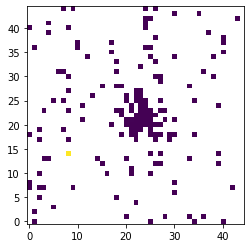

In [15]:
Ne_wing[Ne_wing<20] == 0
Ne_wing[Ne_wing>10000] == 0

In [10]:
S6716/S6731

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[1.85702848e+00, 1.48720455e+00, 1.16938965e+02, ...,
        4.46388930e-01, 6.62776901e-22, 1.08484829e-13],
       [1.41088192e-30, 9.98570615e-23, 3.13556671e+00, ...,
        3.83476953e+03, 1.62784389e-22, 3.84014845e-01],
       [1.90242123e-35, 2.31332329e-18, 2.26695645e-19, ...,
        1.87662244e-01, 1.55722782e-25, 3.18480563e+00],
       ...,
       [4.07313753e-26, 3.64245522e-26, 1.86597079e-01, ...,
        8.74803084e-31, 8.79336816e+03, 1.07160490e-03],
       [2.10787643e+02, 7.51225232e-32, 4.52137850e-02, ...,
        1.17287981e-39, 8.56633091e+00, 1.19053161e-21],
       [2.55331028e-25, 1.42203418e+04, 1.00878427e-33, ...,
        4.11500803e-23, 1.64862024e-21, 7.25511551e+25]], dtype=float32)